95 1903767509960.6692 
 145 1907167154652.5344 
 195 1918365816370.329 
 295 2065432626173.2256


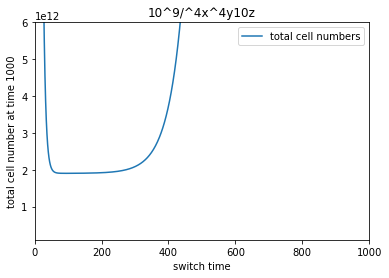

In [2]:
#!/usr/bin/python

import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def func(x, t, *arg):
    (a, b, c, f, g, h, k, p, q ) = arg
    dw = a*x[0] 
    dx = g*x[0] + b*x[1]
    dy = h*x[0] + c*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz]) 
    
initial_N = 10**9
tim = []
total = []
output = []
t_end = 1000

aA = -0.17
bA = 0.045
cA = -0.13
fA = 0.022 
gA = 0.0000001 
hA = 0.0000001 
kA = 0.0000001 
pA = 0.0000001 
qA = 0.0000001 
paramsA = (aA, bA, cA, fA, gA, hA, kA, pA, qA )
aB = -0.32
bB = -0.15
cB = 0.024
fB = 0.022 
gB = 0.0000001 
hB = 0.0000001 
kB = 0.0000001 
pB = 0.0000001 
qB = 0.0000001 
paramsB = (aB, bB, cB, fB, gB, hB, kB, pB, qB )

for t in np.arange(1, 1000, 1):
    tan = t
    cell_init = (initial_N - 10**4 - 10**4 - 10, 10**4, 10**4, 10)
    list_t = np.arange(0, tan, 0.01) 
    list_t1 = np.arange(tan, t_end, 0.01) 
    cells = odeint(func, cell_init, list_t, args = paramsA)  
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]    
    cell1 = odeint(func, cell1_init, list_t1, args = paramsB) 
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    tim.append(t) 
    total.append(celltotal1[-1]) 

fig = plt.figure()
ax = fig.add_subplot(111)
print(tim[94], total[94],'\n',tim[144], total[144],'\n',tim[194], total[194],'\n',tim[294], total[294])
ax.plot(tim, total, label='total cell numbers')
ax.legend()

ax.set_xlim(0, 1000)
ax.set_ylim(0.1*(10**12),6*(10**12))
ax.set_xlabel('switch time')
ax.set_ylabel('total cell number at time 1000') #tef
ax.set_title('10^9/^4x^4y10z')

plt.show()